In [1]:
%pylab inline   
import numpy as np
import pylab as plt
plt.rcParams['figure.figsize'] = (10.0, 8.0)
# libraries and other shnyaga

Populating the interactive namespace from numpy and matplotlib


In [2]:
# generates first class
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# generates second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [3]:
def get_grid(data):  # makes grid
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

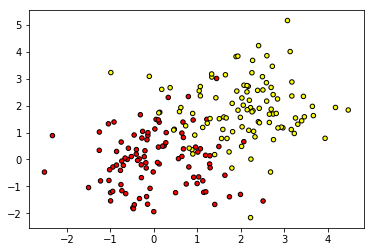

In [11]:
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=20, cmap='autumn', edgecolors='black') # drawing data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# parameter min_samples_leaf indicates minimal number 
# of elements in node for splitting
clf = DecisionTreeClassifier(min_samples_leaf=5)
clf.fit(train_data, train_labels)

xx, yy = get_grid(train_data)
predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=20, cmap='autumn', edgecolors='black')

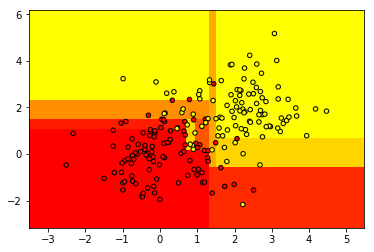

In [14]:
# calculating probabilities
predicted_proba = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape) 
plt.pcolormesh(xx, yy, predicted_proba, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=20, cmap='autumn', edgecolors='black')

In [15]:
# generating test data
test_data = np.random.normal(size=(100, 2), loc = 1)
predicted = clf.predict(test_data)

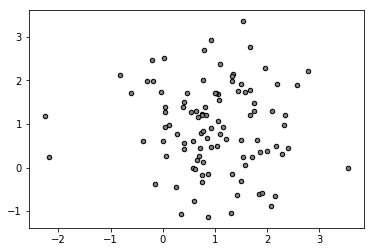

In [16]:
# displaying test data
plt.scatter(test_data[:, 0], test_data[:, 1], c="gray", s=20, edgecolors='black')

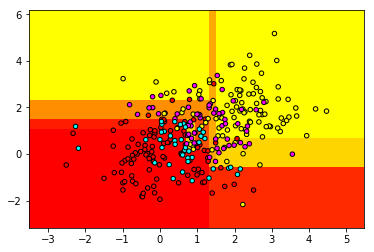

In [17]:
# results of classification
plt.pcolormesh(xx, yy, predicted_proba, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=20, cmap='autumn', edgecolors='black')
plt.scatter(test_data[:, 0], test_data[:, 1], c=predicted, s=20, cmap='cool', edgecolors='black')